# Cleaning the Bios
Vectorizing the bios

### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords

### Loading the Data

In [85]:
with open("profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

## Cleaning the Text

In [86]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

In [87]:
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    

In [88]:
df['Bios'] = df.Bios.apply(tokenize)

### Most Frequent Words

In [89]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  104


In [91]:
# Determining the most frequent words in user bios
words = []

for bio in df['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

[('fanatic', 2241),
 ('travel', 1737),
 ('music', 1681),
 ('food', 1657),
 ('social', 1654),
 ('zombie', 1652),
 ('pop', 1645),
 ('tv', 1636),
 ('twitter', 1622),
 ('coffee', 1617),
 ('web', 1612),
 ('beer', 1605),
 ('bacon', 1585),
 ('medium', 1577),
 ('alcohol', 1574),
 ('culture', 1572),
 ('internet', 1534),
 ('expert', 1183),
 ('geek', 1165),
 ('buff', 1164),
 ('lover', 1159),
 ('guru', 1158),
 ('fan', 1157),
 ('ninja', 1143),
 ('scholar', 1142),
 ('trailblazer', 1138),
 ('maven', 1137),
 ('junkie', 1134),
 ('specialist', 1119),
 ('advocate', 1116),
 ('enthusiast', 1108),
 ('practitioner', 1105),
 ('nerd', 1101),
 ('aficionado', 1099),
 ('evangelist', 1092),
 ('introvert', 861),
 ('gamer', 853),
 ('reader', 850),
 ('communicator', 829),
 ('writer', 815),
 ('creator', 815),
 ('student', 808),
 ('explorer', 806),
 ('thinker', 805),
 ('analyst', 804),
 ('certified', 793),
 ('troublemaker', 787),
 ('general', 786),
 ('organizer', 781),
 ('problem', 770),
 ('solver', 770),
 ('devoted', 

### Plotting the Most Frequent Words

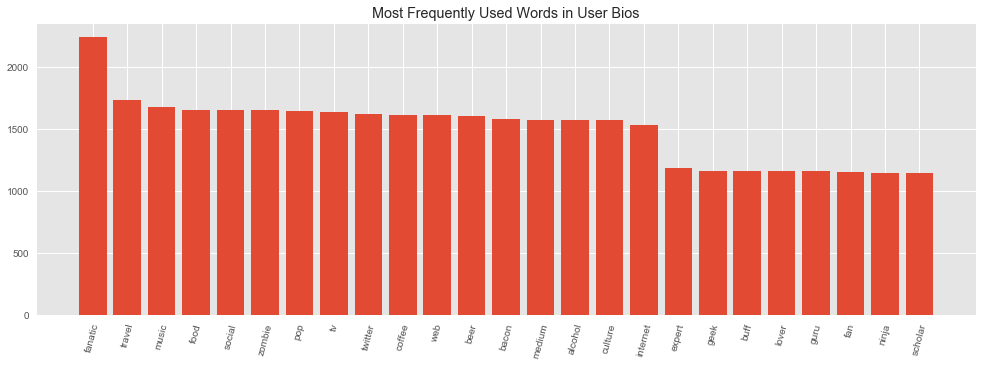

In [92]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

## Vectorizing